# Práctica Sistemas Lineales

### Importo Librerias

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import math
import copy
import numpy.linalg as linalg

### Importo imagenes

In [3]:
imgToTest = imageio.imread('img/lena.png')

# Ejercicio 1

In [24]:
def plotPointsCenterAxis(x, h):
    ax = plt.figure().add_subplot(111)
    ax.scatter(x,h)
    plt.xlim((-5,5))
    plt.ylim((-5,5))

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()

## a)
$$x_{-1} = 0, x_0=1, x_1=0, x_2=0, x_3=0, x_4=0$$
$$h_{-1} = 0, h_0=2, h_1=1, h_2=0, h_3=0, h_4=0$$

<br/>

$$x'_u = (x * h)_u = \sum_{i=-\infty}^\infty x_{u-i} \cdot h_{i}$$

<br/>

$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = 2$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 0$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 1$$

<br/>
<br/>

$$x'_{-1} = 1, x'_0=2, x'_1=0, x'_2=0, x'_3=0, x'_4=0$$

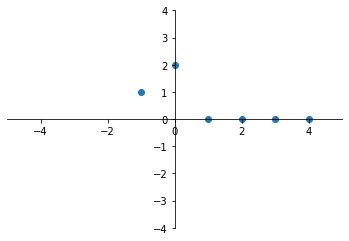

In [21]:
plotPointsCenterAxis([x-1 for x in range(6)], [1,2,0,0,0,0])


## b)
$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = 1$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 2$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 0$$

<br/>
<br/>

$$x'_{-1} = 0, x'_0=1, x'_1=2, x'_2=0, x'_3=0, x'_4=0$$

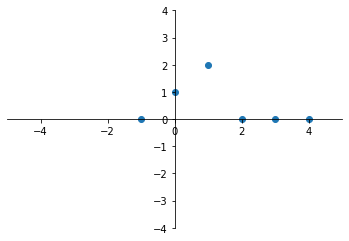

In [22]:
plotPointsCenterAxis([x-1 for x in range(6)], [0,1,2,0,0,0])

## c)
$$x'_0 = x_{-1} \cdot h_{-1} + x_{0} \cdot h_0 + ... + x_{4} \cdot h_4 = -4$$

$$x'_1 = x_{0} \cdot h_{-1} + x_{1} \cdot h_0 + ... + x_{4} \cdot h_3 = 1$$

$$x'_2 = x_{1} \cdot h_{-1} + x_{2} \cdot h_0 + ... + x_{4} \cdot h_2 = 0$$

$$x'_3 = x_{2} \cdot h_{-1} + x_{3} \cdot h_0 + x_{4} \cdot h_1 = 0$$

$$x'_4 = x_{3} \cdot h_{-1} + x_{4} \cdot h_0 = 0$$

$$x'_5 = x_{4} \cdot h_{-1} = 0$$

$$x'_{-1} = x_{-2} \cdot h_{-1} + x_{-1} \cdot h_0 + ... + x_{3} \cdot h_4 = 4$$

$$x'_{-2} = 2$$

<br/>
<br/>

$$x'_{-2}=2, x'_{-1}=4, x'_0=-4, x'_1=1, x'_2=0, x'_3=0, x'_4=0$$

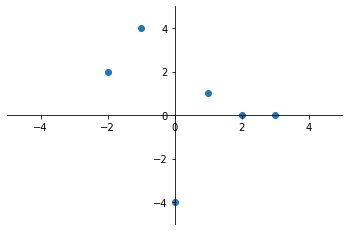

In [25]:
plotPointsCenterAxis([x-2 for x in range(6)], [2,4,-4,1,0,0])

## d)
$$x'_{u,v} = (x * h)_{u,v} = \sum_{i=-\infty}^\infty \sum_{j=-\infty}^\infty x_{u-i,v-j} \cdot h_{i,j}$$

<br/>

$$x'_{0,0} = x_{1,0} \cdot h_{1,0} + x_{1,1} \cdot h_{1,1} = 2$$

$$x'_{1,0} = x_{1,0} \cdot h_{0,0} + x_{1,1} \cdot h_{0,1} + x_{2,0} \cdot h_{1,0} + x_{2,1} \cdot h_{1,1}  = 4$$

$$x'_{2,0} = 4$$

$$x'_{3,0} = 2$$

$$x'_{0,1} = 1$$

$$x'_{0,2} = 0$$

... termino con programa

<br/>
<br/>


In [42]:
def calc(X, H, u, v):
    res = 0
    for x in range(-10,10):
        for y in range(-10,10):
            if u-x in X and v-y in X[u-x] and x in H and y in H[x]:
                res += X[u-x][v-y]*H[x][y]
    return res

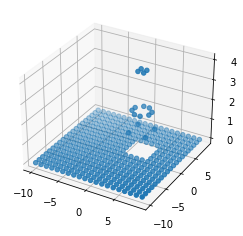

In [68]:
xs,ys,hs=[],[],[]
X = {
    1:{
        0: 1,
        1: 1,
        2: 1
    },
    2:{
        0: 1,
        1: 1,
        2: 1
    },
    3:{
        0: 1,
        1: 1,
        2: 1
    }
}
H = {
    0:{
        0:1,
        1:1
    },
    1:{
        0:1,
        1:1
    }
}
for x in range(-10,10):
    for y in range(-10,10):
        xs.append(x)
        ys.append(y)
        hs.append(calc(X, H, x, y))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs, ys, hs)

# Ejercicio 2

# Ejercicio 3

# Ejercicio 4

# Ejercicio 5

# Ejercicio 6